If you use OSMnx in your work, please cite the journal article:

Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

In [1]:
import osmnx as ox
import networkx as nx
import shapely
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdb

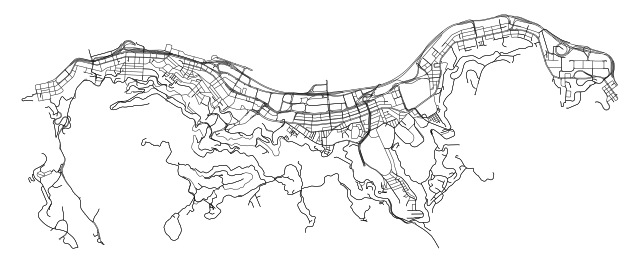

In [48]:
# get HK island road network
# hk island: 22.296438, 22.258178, 114.222375, 114.124862,
# hk island and kowloon: 22.356940238218694, 22.258178, 114.2259475, 114.124862,
G_hk = ox.graph.graph_from_bbox(
    22.296438, 22.258178, 114.222375, 114.124862,
    network_type='drive',
    retain_all=False,
    truncate_by_edge=False,
    simplify=True
)


fig, ax = ox.plot.plot_graph(G_hk, node_size=0, bgcolor='w', edge_color='k', edge_linewidth=.3, save=1, filepath='./hkmap/hk.png', dpi=500)


In [3]:
len(G_hk.edges)

3890

In [4]:
len(G_hk.nodes)

2135

In [35]:
poly_node = pd.read_csv('./hkmap/polygon_verteces.csv')

poly = pd.read_csv('./hkmap/polygon.csv', index_col=0)

edges = pd.read_csv('./hkmap/edges.csv')
for i in edges.index:
    from_node = edges.loc[i, 'from']
    from_coor = poly_node.loc[poly_node['node']==from_node, ['lon', 'lat']].values.flatten()
    to_node = edges.loc[i, 'to']
    to_coor = poly_node.loc[poly_node['node']==to_node, ['lon', 'lat']].values.flatten()
    
    edges.loc[i, 'distance'] = np.linalg.norm(from_coor - to_coor) * 111

poly_node.head()

,node,lon,lat
0,1,114.124456,22.284502
1,2,114.125668,22.279051
2,3,114.128878,22.274865
3,4,114.133367,22.290534
4,5,114.133350,22.284327


In [36]:
poly_node['Point Geometry'] = ''
for i in poly_node.index:
    poly_node.loc[i, 'Point Geometry'] = shapely.geometry.Point((poly_node.loc[i, 'lon'], poly_node.loc[i, 'lat']))



In [37]:
poly['Polygon Geometry'] = ''
for i in poly.index:
    points = [int(j) for j in poly.loc[i, 'geo'].split(',')]
    points_geo = [poly_node.loc[poly_node['node']==j, 'Point Geometry'].values[0] for j in points]

    poly.loc[i, 'Polygon Geometry'] = shapely.geometry.Polygon(points_geo)
    

# fetch osmnx data

In [14]:
tags = {'amenity': ['restaurant', 'fast_food', 'cafe', 'food_court']}
poly['num restaurants'] = ''
for i in poly.index:
    print('Fetching No.', i)
    num_rest_i = ox.geometries.geometries_from_polygon(poly.loc[i, 'Polygon Geometry'], tags=tags).shape[0]
    poly.loc[i, 'num restaurants'] = num_rest_i
    

Fetching No. 0
Fetching No. 1
Fetching No. 2
Fetching No. 3
Fetching No. 4
Fetching No. 5
Fetching No. 6
Fetching No. 7
Fetching No. 8
Fetching No. 9
Fetching No. 10
Fetching No. 11
Fetching No. 12
Fetching No. 13
Fetching No. 14
Fetching No. 15
Fetching No. 16
Fetching No. 17
Fetching No. 18
Fetching No. 19
Fetching No. 20
Fetching No. 21
Fetching No. 22
Fetching No. 23
Fetching No. 24
Fetching No. 25
Fetching No. 26
Fetching No. 27
Fetching No. 28
Fetching No. 29
Fetching No. 30
Fetching No. 31


In [10]:
tags = {'amenity': ['parking']}
poly['num parking lots'] = ''
for i in poly.index:
    print('Fetching No.', i)
    num_rest_i = ox.geometries.geometries_from_polygon(poly.loc[i, 'Polygon Geometry'], tags=tags).shape[0]
    poly.loc[i, 'num parking lots'] = num_rest_i
    

Fetching No. 0
Fetching No. 1
Fetching No. 2
Fetching No. 3
Fetching No. 4
Fetching No. 5
Fetching No. 6
Fetching No. 7
Fetching No. 8
Fetching No. 9
Fetching No. 10
Fetching No. 11
Fetching No. 12
Fetching No. 13
Fetching No. 14
Fetching No. 15
Fetching No. 16
Fetching No. 17
Fetching No. 18
Fetching No. 19
Fetching No. 20
Fetching No. 21
Fetching No. 22
Fetching No. 23
Fetching No. 24
Fetching No. 25
Fetching No. 26
Fetching No. 27
Fetching No. 28
Fetching No. 29
Fetching No. 30
Fetching No. 31


In [15]:
tags = {'amenity': ['parking_space']}
poly['num parking spaces'] = ''
for i in poly.index:
    print('Fetching No.', i)
    num_rest_i = ox.geometries.geometries_from_polygon(poly.loc[i, 'Polygon Geometry'], tags=tags).shape[0]
    poly.loc[i, 'num parking spaces'] = num_rest_i
    

Fetching No. 0
Fetching No. 1
Fetching No. 2
Fetching No. 3
Fetching No. 4
Fetching No. 5
Fetching No. 6
Fetching No. 7
Fetching No. 8
Fetching No. 9
Fetching No. 10
Fetching No. 11
Fetching No. 12
Fetching No. 13
Fetching No. 14
Fetching No. 15
Fetching No. 16
Fetching No. 17
Fetching No. 18
Fetching No. 19
Fetching No. 20
Fetching No. 21
Fetching No. 22
Fetching No. 23
Fetching No. 24
Fetching No. 25
Fetching No. 26
Fetching No. 27
Fetching No. 28
Fetching No. 29
Fetching No. 30
Fetching No. 31


In [35]:
poly['centroid_x'] = ''
poly['centroid_y'] = ''

for i in poly.index:
    poly.loc[i, 'centroid_x'] = poly.loc[i, 'Polygon Geometry'].centroid.x
    poly.loc[i, 'centroid_y'] = poly.loc[i, 'Polygon Geometry'].centroid.y

In [36]:
poly

,polygon,polygon_name,geo,func,Polygon Geometry,num restaurants,centroid_x,centroid_y,num parking lots,num parking spaces
0,1,KT,"1,2,5,4",MR,"POLYGON ((114.124456 22.284502, 114.125668 22....",82,114.129194,22.284669,3,0
1,2,PFL,"2,3,6,5",R,"POLYGON ((114.125668 22.279051, 114.128878 22....",5,114.130289,22.279226,0,0
2,3,SYP,"4,5,9,8,7",MR,"POLYGON ((114.133367 22.290534, 114.13335 22.2...",108,114.140824,22.286555,12,0
3,4,C,"7,8,13,12",B,"POLYGON ((114.147604 22.291782, 114.14687 22.2...",263,114.155801,22.285525,16,0
4,5,WML,"8,9,14,13",MR,"POLYGON ((114.14687 22.287106, 114.146255 22.2...",74,114.152156,22.2794,5,0
5,6,MP,"9,10,15,19,18,14",R,"POLYGON ((114.146255 22.27973, 114.143097 22.2...",5,114.158272,22.271048,4,0
6,7,P,"10,11,15",R,"POLYGON ((114.143097 22.273996, 114.146381 22....",1,114.148963,22.26571,1,0
7,8,WC,"12,13,17,16",B,"POLYGON ((114.164932 22.287256, 114.159476 22....",40,114.168277,22.282155,7,2
8,9,EML,"13,14,18,17",MR,"POLYGON ((114.159476 22.277576, 114.155917 22....",202,114.166207,22.275333,8,1
9,10,CB,"16,17,18,21,20",MR,"POLYGON ((114.175655 22.285659, 114.174873 22....",336,114.180275,22.279534,26,0


In [25]:
EV_charger_spots_data = pd.read_csv('./EV_Charger_Locations_202303_chi.csv', index_col=0)

In [26]:
for i in range(1, EV_charger_spots_data.shape[0]):
    ind = EV_charger_spots_data.index[i]
    ind_prev = EV_charger_spots_data.index[i-1]
    if pd.isna(EV_charger_spots_data.loc[ind, 'Unnamed: 0']) \
        and EV_charger_spots_data.iloc[i, 1] == EV_charger_spots_data.iloc[i-1, 1]:
        EV_charger_spots_data.loc[ind, 'Latitude'] = EV_charger_spots_data.loc[ind_prev, 'Latitude']
        EV_charger_spots_data.loc[ind, 'Longitude'] = EV_charger_spots_data.loc[ind_prev, 'Longitude']
    else:
        None

In [27]:
EV_charger_spots_data.head()

,Unnamed: 0,Location 地點,Standard BS1363,Medium IEC 62196 (≦20kW),Medium SAE J1772,Medium Others,Quick CHAdeMO,Quick CCS Combo 2,Quick IEC 62196 (>20kW),Quick GB/T 20234.3 (DC),Quick Others,"Remark for ""Others"" 附註",Latitude,Longitude,count_tot
0,NaN,Hong Kong Island 香港島,135.0,917,1.0,75,8.0,19.0,80.0,0.0,100.0,NaN,NaN,NaN,NaN
1,NaN,Central & Western District 中西區,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,The Peak Galleria 山頂廣場,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,22.27058,114.149608,2.0
3,NaN,The Peak Galleria 山頂廣場,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Tesla Wall Connector,22.27058,114.149608,2.0
4,2,The Centrium 中央廣場,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.28088,114.154664,4.0


In [28]:
poly['num EV charger'] = 0
for i in poly.index:
    for j in EV_charger_spots_data.index:
        lat = EV_charger_spots_data.loc[j, 'Latitude']
        lon = EV_charger_spots_data.loc[j, 'Longitude']
        this_point = shapely.geometry.Point(lon, lat)
        if poly.loc[i, 'Polygon Geometry'].contains(this_point):
            poly.loc[i, 'num EV charger'] += EV_charger_spots_data.loc[j, 'count_tot']

In [29]:
poly

,polygon,polygon_name,geo,func,Polygon Geometry,num restaurants,centroid_x,centroid_y,num parking lots,num parking spaces,num EV charger
0,1,KT,"1,2,5,4",MR,"POLYGON ((114.124456 22.284502, 114.125668 22....",82,114.129194,22.284669,3,0,60
1,2,PFL,"2,3,6,5",R,"POLYGON ((114.125668 22.279051, 114.128878 22....",5,114.130289,22.279226,0,0,0
2,3,SYP,"4,5,9,8,7",MR,"POLYGON ((114.133367 22.290534, 114.13335 22.2...",108,114.140824,22.286555,12,0,26
3,4,C,"7,8,13,12",B,"POLYGON ((114.147604 22.291782, 114.14687 22.2...",263,114.155801,22.285525,16,0,230
4,5,WML,"8,9,14,13",MR,"POLYGON ((114.14687 22.287106, 114.146255 22.2...",74,114.152156,22.279400,5,0,4
5,6,MP,"9,10,15,19,18,14",R,"POLYGON ((114.146255 22.27973, 114.143097 22.2...",5,114.158272,22.271048,4,0,4
6,7,P,"10,11,15",R,"POLYGON ((114.143097 22.273996, 114.146381 22....",1,114.148963,22.265710,1,0,0
7,8,WC,"12,13,17,16",B,"POLYGON ((114.164932 22.287256, 114.159476 22....",40,114.168277,22.282155,7,2,113
8,9,EML,"13,14,18,17",MR,"POLYGON ((114.159476 22.277576, 114.155917 22....",202,114.166207,22.275333,8,1,88
9,10,CB,"16,17,18,21,20",MR,"POLYGON ((114.175655 22.285659, 114.174873 22....",336,114.180275,22.279534,26,0,58


In [149]:
poly.to_csv('polygon.csv')

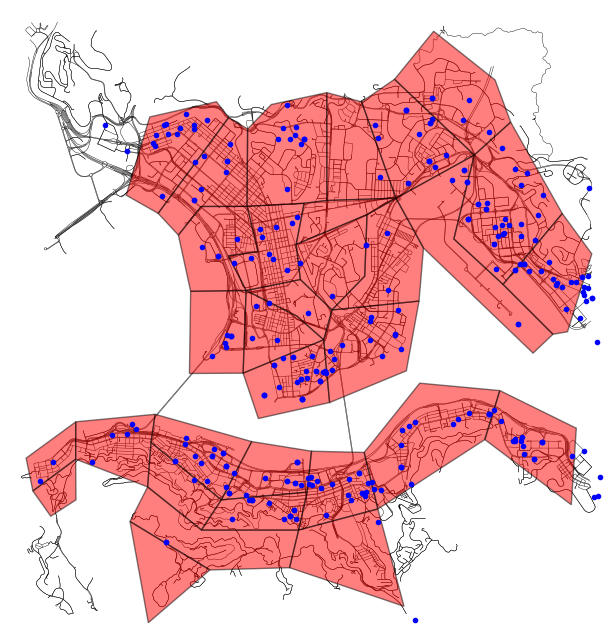

In [44]:
fig, ax = ox.plot.plot_graph(G_hk, node_size=0, bgcolor='w', edge_color='k', edge_linewidth=.3, save=0, show=False, close=False)

geoms = shapely.geometry.MultiPolygon(list(poly['Polygon Geometry'])[:])

for geom in geoms.geoms:    
    xs, ys = geom.exterior.xy    
    ax.fill(xs, ys, alpha=0.5, fc='r', ec='k')

for j in EV_charger_spots_data.index:
    lat = EV_charger_spots_data.loc[j, 'Latitude']
    lon = EV_charger_spots_data.loc[j, 'Longitude']
    this_point = shapely.geometry.Point(lon, lat)
    try:
        ax.plot(this_point.x, this_point.y, 'b.')
    except:
        None

# fig.savefig('partition_result_with_EVCharger.png', dpi=500)


In [38]:
G = nx.Graph()

# hk and kowloon
# G.add_nodes_from(poly['polygon'])
# G.add_weighted_edges_from(edges.iloc[:, 1:].to_numpy())

# hk only
G.add_nodes_from(poly['polygon'].loc[:12])
G.add_weighted_edges_from(edges.iloc[:16, 1:].to_numpy())

pos = dict(zip(poly['polygon'].to_numpy(), poly[['centroid_x', 'centroid_y']].to_numpy()))

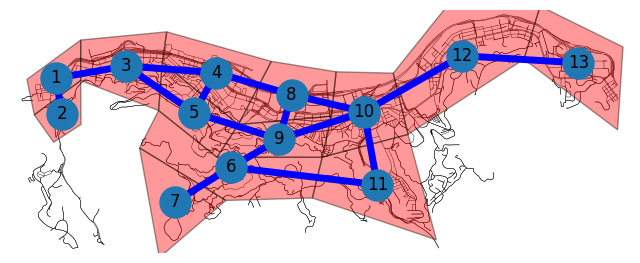

In [53]:
fig, ax = ox.plot.plot_graph(G_hk, node_size=0, bgcolor='w', edge_color='k', edge_linewidth=.3, save=0, show=False, close=False)

# hk and kowloon
# geoms = shapely.geometry.MultiPolygon(list(poly['Polygon Geometry'])[:])

# hk only
geoms = shapely.geometry.MultiPolygon(list(poly['Polygon Geometry'].loc[:12])[:])

for geom in geoms.geoms:    
    xs, ys = geom.exterior.xy    
    ax.fill(xs, ys, alpha=0.4, fc='r', ec='k')
nx.draw_networkx(G, pos=pos, node_size=500, ax=ax, edge_color='b', width=5)

fig.savefig('partition_result.pdf', format='pdf')


In [90]:
for i in range(1, 14):
    print(nx.dijkstra_path_length(G, 12, i))

7.4214666356948324
8.041303447077786
6.24452188983209
5.771822819052703
5.082843234958963
5.008796836405416
7.238115732411112
4.349874946781769
3.5622184494463904
2.8355988501236227
4.736455312223179
0
1.2334009931304712
